# Single Chromosome Simulation

In [1]:
from OpenMiChroM.ChromDynamics import MiChroM
from OpenMiChroM.CndbTools import cndbTools

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import imageio

from openmm.app import *

In [2]:
block = 3*10**2
n_blocks = 2*10**3

**{ chr 10 } simulation**  

In [3]:
sim = MiChroM(name='chr10', temperature=1.0, time_step=0.01)
sim.setup(platform="cuda") # Double-check CUDA installation in your system 
sim.saveFolder('chr10_2000f')
Chrom10 = sim.createSpringSpiral(ChromSeq='../inputs/chr10_beads.txt', isRing=False)
sim.loadStructure(Chrom10, center=True)
sim.saveStructure(mode='pdb')

    ***************************************************************************************     
     **** **** *** *** *** *** *** *** OpenMiChroM-1.0.5 *** *** *** *** *** *** **** ****      

         OpenMiChroM is a Python library for performing chromatin dynamics simulations.         
                            OpenMiChroM uses the OpenMM Python API,                             
                employing the MiChroM (Minimal Chromatin Model) energy function.                
      The chromatin dynamics simulations generate an ensemble of 3D chromosomal structures      
      that are consistent with experimental Hi-C maps, also allows simulations of a single      
                 or multiple chromosome chain using High-Performance Computing                  
                            in different platforms (GPUs and CPUs).                             
         OpenMiChroM documentation is available at https://open-michrom.readthedocs.io          

         OpenMiChroM is desc

In [4]:
sim.addFENEBonds(kfb=30.0)
sim.addAngles(ka=2.0)
sim.addRepulsiveSoftCore(Ecut=4.0)
sim.addTypetoType(mu=3.22, rc = 1.78)
sim.addIdealChromosome(mu=3.22, rc = 1.78, dinit=3, dend=500)
sim.addFlatBottomHarmonic( kr=5*10**-3, n_rad=15.0)

**collapse simulation**  

In [5]:
print('GENERATING INITIAL SIM STRUCTURE', '\n---\n')
for _ in range(n_blocks):
    sim.runSimBlock(block, increment=False) 
    print('1st loop', '\n---\n')

GENERATING INITIAL SIM STRUCTURE 
---

Number of exceptions: 2711
adding force  FENEBond 0
adding force  AngleForce 1
Add exclusions for RepulsiveSoftCore force
adding force  RepulsiveSoftCore 2
Add exclusions for TypetoType force
adding force  TypetoType 3
Add exclusions for IdealChromosome force
adding force  IdealChromosome 4
adding force  FlatBottomHarmonic 5
Positions... 
 loaded!
potential energy is 64.292854
bl=0 pos[1]=[209.4 -11.8 -0.4] dr=0.61 t=0.0ps kin=1.29 pot=64.74 Rg=146.784 SPS=3282 
1st loop 
---

bl=0 pos[1]=[208.0 -11.9 1.3] dr=1.12 t=0.0ps kin=1.89 pot=64.10 Rg=145.915 SPS=4240 
1st loop 
---

bl=0 pos[1]=[206.6 -11.7 3.1] dr=1.49 t=0.0ps kin=2.38 pot=63.21 Rg=144.672 SPS=4124 
1st loop 
---

bl=0 pos[1]=[203.8 -11.5 5.4] dr=1.71 t=0.0ps kin=2.73 pot=62.22 Rg=143.189 SPS=4389 
1st loop 
---

bl=0 pos[1]=[201.0 -10.6 6.8] dr=1.85 t=0.0ps kin=2.95 pot=61.19 Rg=141.540 SPS=4654 
1st loop 
---

bl=0 pos[1]=[199.5 -9.8 8.2] dr=1.93 t=0.0ps kin=3.12 pot=60.14 Rg=139.801 

In [6]:
print(sim.chromRG())
sim.saveStructure(mode='pdb')

7.7939262


In [7]:
# sim.system.getForces()      # WHY GET FORCES ??
sim.system.removeForce(5)
sim.initStorage(filename="traj_chr10_2000f")

In [8]:
# pdb = PDBFile('single_op_chr10/chr10_0_block0.pdb')
pdb = PDBFile('./chr10_2000f/chr10_0_block0.pdb')
top = pdb.getTopology()
top_file = './chr10_2000f/top_chr10_2000f.dcd'

**production simulation**  

In [9]:
with open(top_file, 'wb') as f:
    dcd = DCDFile(f, top, 0.01)
    print('RUNNING SIMULATION', '\n---\n')
    for _ in range(n_blocks):
        sim.runSimBlock(block, increment=True) 
        sim.saveStructure()
        sim.saveStructure(mode='xyz')
        dcd.writeModel(sim.getPositions())
        print('2nd loop', '\n---\n')

RUNNING SIMULATION 
---

bl=1 pos[1]=[4.7 -5.8 0.1] dr=0.75 t=0.0ps kin=1.52 pot=19.81 Rg=7.790 SPS=2589 
2nd loop 
---

bl=2 pos[1]=[5.1 -6.5 -0.2] dr=0.75 t=0.0ps kin=1.53 pot=19.81 Rg=7.782 SPS=3078 
2nd loop 
---

bl=3 pos[1]=[4.7 -7.2 -1.1] dr=0.75 t=0.0ps kin=1.53 pot=19.81 Rg=7.768 SPS=3354 
2nd loop 
---

bl=4 pos[1]=[3.5 -6.4 -1.6] dr=0.75 t=0.0ps kin=1.54 pot=19.80 Rg=7.758 SPS=3283 
2nd loop 
---

bl=5 pos[1]=[3.3 -6.3 -1.0] dr=0.75 t=0.0ps kin=1.57 pot=19.80 Rg=7.749 SPS=3025 
2nd loop 
---

bl=6 pos[1]=[3.3 -6.2 -1.0] dr=0.75 t=0.0ps kin=1.48 pot=19.85 Rg=7.767 SPS=3066 
2nd loop 
---

bl=7 pos[1]=[3.4 -6.3 -1.3] dr=0.74 t=0.0ps kin=1.52 pot=19.79 Rg=7.759 SPS=3182 
2nd loop 
---

bl=8 pos[1]=[3.4 -6.4 -1.0] dr=0.74 t=0.0ps kin=1.52 pot=19.80 Rg=7.748 SPS=3154 
2nd loop 
---

bl=9 pos[1]=[3.1 -6.7 -2.1] dr=0.73 t=0.0ps kin=1.51 pot=19.80 Rg=7.734 SPS=3123 
2nd loop 
---

bl=10 pos[1]=[4.3 -6.2 -2.3] dr=0.75 t=0.0ps kin=1.51 pot=19.80 Rg=7.725 SPS=2753 
2nd loop 
---

bl=11

In [10]:
sim.saveStructure(mode='pdb')
sim.storage[0].close()

# Trajectory Analysis

In [2]:
from OpenMiChroM.ChromDynamics import MiChroM
from OpenMiChroM.CndbTools import cndbTools

In [3]:
cndbTools = cndbTools()
chr10_traj = cndbTools.load('./chr10_2000f/traj_chr10_2000f_0.cndb')
print(chr10_traj)
# EXTRACT LOCI XYZ POSITIONS OVER FRAMES
chr10_xyz = cndbTools.xyz(frames=[1,2000,1], beadSelection='all', XYZ=[0,1,2])

Cndb file has 2000 frames, with 2712 beads and {b'A2', b'B2', b'NA', b'A1', b'B1', b'B3'} types 


---  
#### `cnbdTools.xyz()` &rarr; get the selected beads' 3D position from a *cndb* or *ndb* for multiple frames  
* write .xyz file
* convert to .tiff

In [4]:
print(chr10_xyz.shape)

(1999, 2712, 3)


In [5]:
with open('./stack_output/xyz_numpy.npy', 'wb') as f:
    np.save(f, chr10_xyz)

a = []
with open('./stack_output/xyz_numpy.npy', 'rb') as f:
    a = np.load(f)
a.shape

(1999, 2712, 3)

In [6]:
imageio.imwrite('./stack_output/chr10.tiff', chr10_xyz)
a = imageio.imread('./stack_output/chr10.tiff')
a.shape

C:\Users\Mars\AppData\Local\Temp\ipykernel_5648\1194822760.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  a = imageio.imread('./stack_output/chr10.tiff')


(1999, 2712, 3)

In [16]:
chr10_MSD = cndbTools.compute_MSD(chr10_xyz)
plt.plot(chr10_MSD)
plt.imshow()

NameError: name '_msd_fft' is not defined

&uarr; check this error  
`NameError: name '_msd_fft' is not defined`

Text(0.5, 0, 'Simulation Frames')

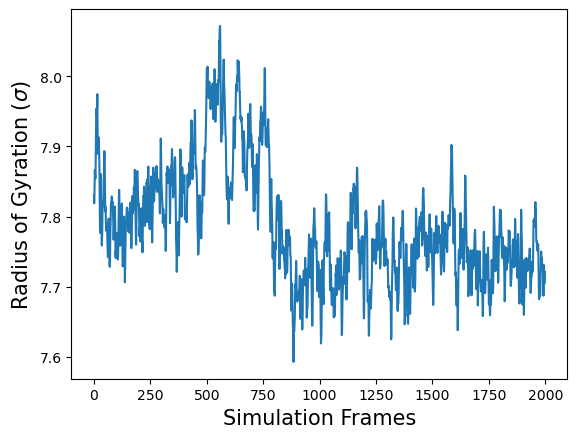

In [35]:
import matplotlib.pyplot as plt
import matplotlib as mpl


chr10_RG = cndbTools.compute_RG(chr10_xyz)    # calculate radius ofgyration using xyz file
plt.plot(chr10_RG)
plt.ylabel(r'Radius of Gyration ($\sigma$)',fontsize=15)
plt.xlabel(r'Simulation Frames',fontsize=15)

In [36]:
print(chr10_RG.shape)

(1999,)


In [37]:
chr10_A1 = cndbTools.xyz(frames=[1,2000,1], beadSelection=chr10_traj.dictChromSeq[b'A1'], XYZ=[0,1,2])
chr10_A2 = cndbTools.xyz(frames=[1,2000,1], beadSelection=chr10_traj.dictChromSeq[b'A2'], XYZ=[0,1,2])
chr10_B1 = cndbTools.xyz(frames=[1,2000,1], beadSelection=chr10_traj.dictChromSeq[b'B1'], XYZ=[0,1,2])
chr10_B2 = cndbTools.xyz(frames=[1,2000,1], beadSelection=chr10_traj.dictChromSeq[b'B2'], XYZ=[0,1,2])
chr10_B3 = cndbTools.xyz(frames=[1,2000,1], beadSelection=chr10_traj.dictChromSeq[b'B3'], XYZ=[0,1,2])
chr10_NA = cndbTools.xyz(frames=[1,2000,1], beadSelection=chr10_traj.dictChromSeq[b'NA'], XYZ=[0,1,2])

In [38]:
print("Computing RDP...")
r_A1, RDP_chr10_A1 = cndbTools.compute_RDP(chr10_A1, radius=15.0, bins=200)
r_A2, RDP_chr10_A2 = cndbTools.compute_RDP(chr10_A2, radius=15.0, bins=200)
r_B1, RDP_chr10_B1 = cndbTools.compute_RDP(chr10_B1, radius=15.0, bins=200)
r_B2, RDP_chr10_B2 = cndbTools.compute_RDP(chr10_B2, radius=15.0, bins=200)
r_B3, RDP_chr10_B3 = cndbTools.compute_RDP(chr10_B3, radius=15.0, bins=200)
r_NA, RDP_chr10_NA = cndbTools.compute_RDP(chr10_NA, radius=15.0, bins=200)

Computing RDP...


(0.005, 15.0)

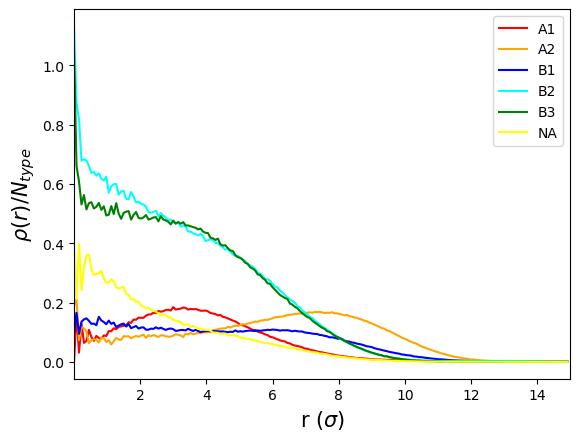

In [39]:
plt.plot(r_A1, RDP_chr10_A1, color='red', label='A1')
plt.plot(r_A2, RDP_chr10_A2, color='orange', label='A2')
plt.plot(r_B1, RDP_chr10_B1, color='blue', label='B1')
plt.plot(r_B2, RDP_chr10_B2, color='cyan', label='B2')
plt.plot(r_B3, RDP_chr10_B3, color='green', label='B3')
plt.plot(r_NA, RDP_chr10_NA, color='yellow', label='NA')
plt.xlabel(r'r ($\sigma$)', fontsize=15, fontweight='normal', color='k')
plt.ylabel(r'$\rho(r)/N_{type}$', fontsize=15, fontweight='normal', color='k')
plt.legend()
plt.gca().set_xlim([1/200,15.0])

In [40]:
print("Generating the contact probability matrix...")
chr10_sim_HiC = cndbTools.traj2HiC(chr10_xyz)

Generating the contact probability matrix...
Reading frame 0 of 1999
Reading frame 500 of 1999
Reading frame 1000 of 1999
Reading frame 1500 of 1999


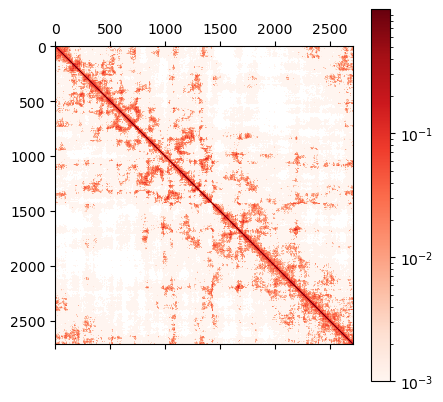

In [41]:
plt.matshow(chr10_sim_HiC, norm=mpl.colors.LogNorm(vmin=0.001, vmax=chr10_sim_HiC.max()),cmap="Reds")  
plt.colorbar()

In [48]:
chr10_MSD = cndbTools.compute_MSD(chr10_xyz)
plt.plot(chr10_MSD)
plt.imshow()

NameError: name '_msd_fft' is not defined